/tmp/ipykernel_3129385/3651362871.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['proto'].replace({'TCP': 0, 'UDP': 1}, inplace=True)
/tmp/ipykernel_3129385/3651362871.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['proto'].replace({'TCP': 0, 'UDP': 1}, inplace=True)


                            srcport.std  dstport.std  frame.len.min  \
srcport.std                        1.00         1.00          -0.12   
dstport.std                        1.00         1.00          -0.12   
frame.len.min                     -0.12        -0.12           1.00   
frame.len.max                      0.09         0.09           0.02   
frame.len.std                      0.13         0.13          -0.03   
frame.len.mean                     0.07         0.07           0.33   
frame.len.rate                    -0.01        -0.01           0.03   
ip.flags.rb                         NaN          NaN            NaN   
ip.flags.df                        0.33         0.33          -0.16   
ip.flags.mf                         NaN          NaN            NaN   
tcp.flags.res                      0.00         0.00          -0.00   
tcp.flags.ns                        NaN          NaN            NaN   
tcp.flags.cwr                     -0.01        -0.01           0.00   
tcp.fl

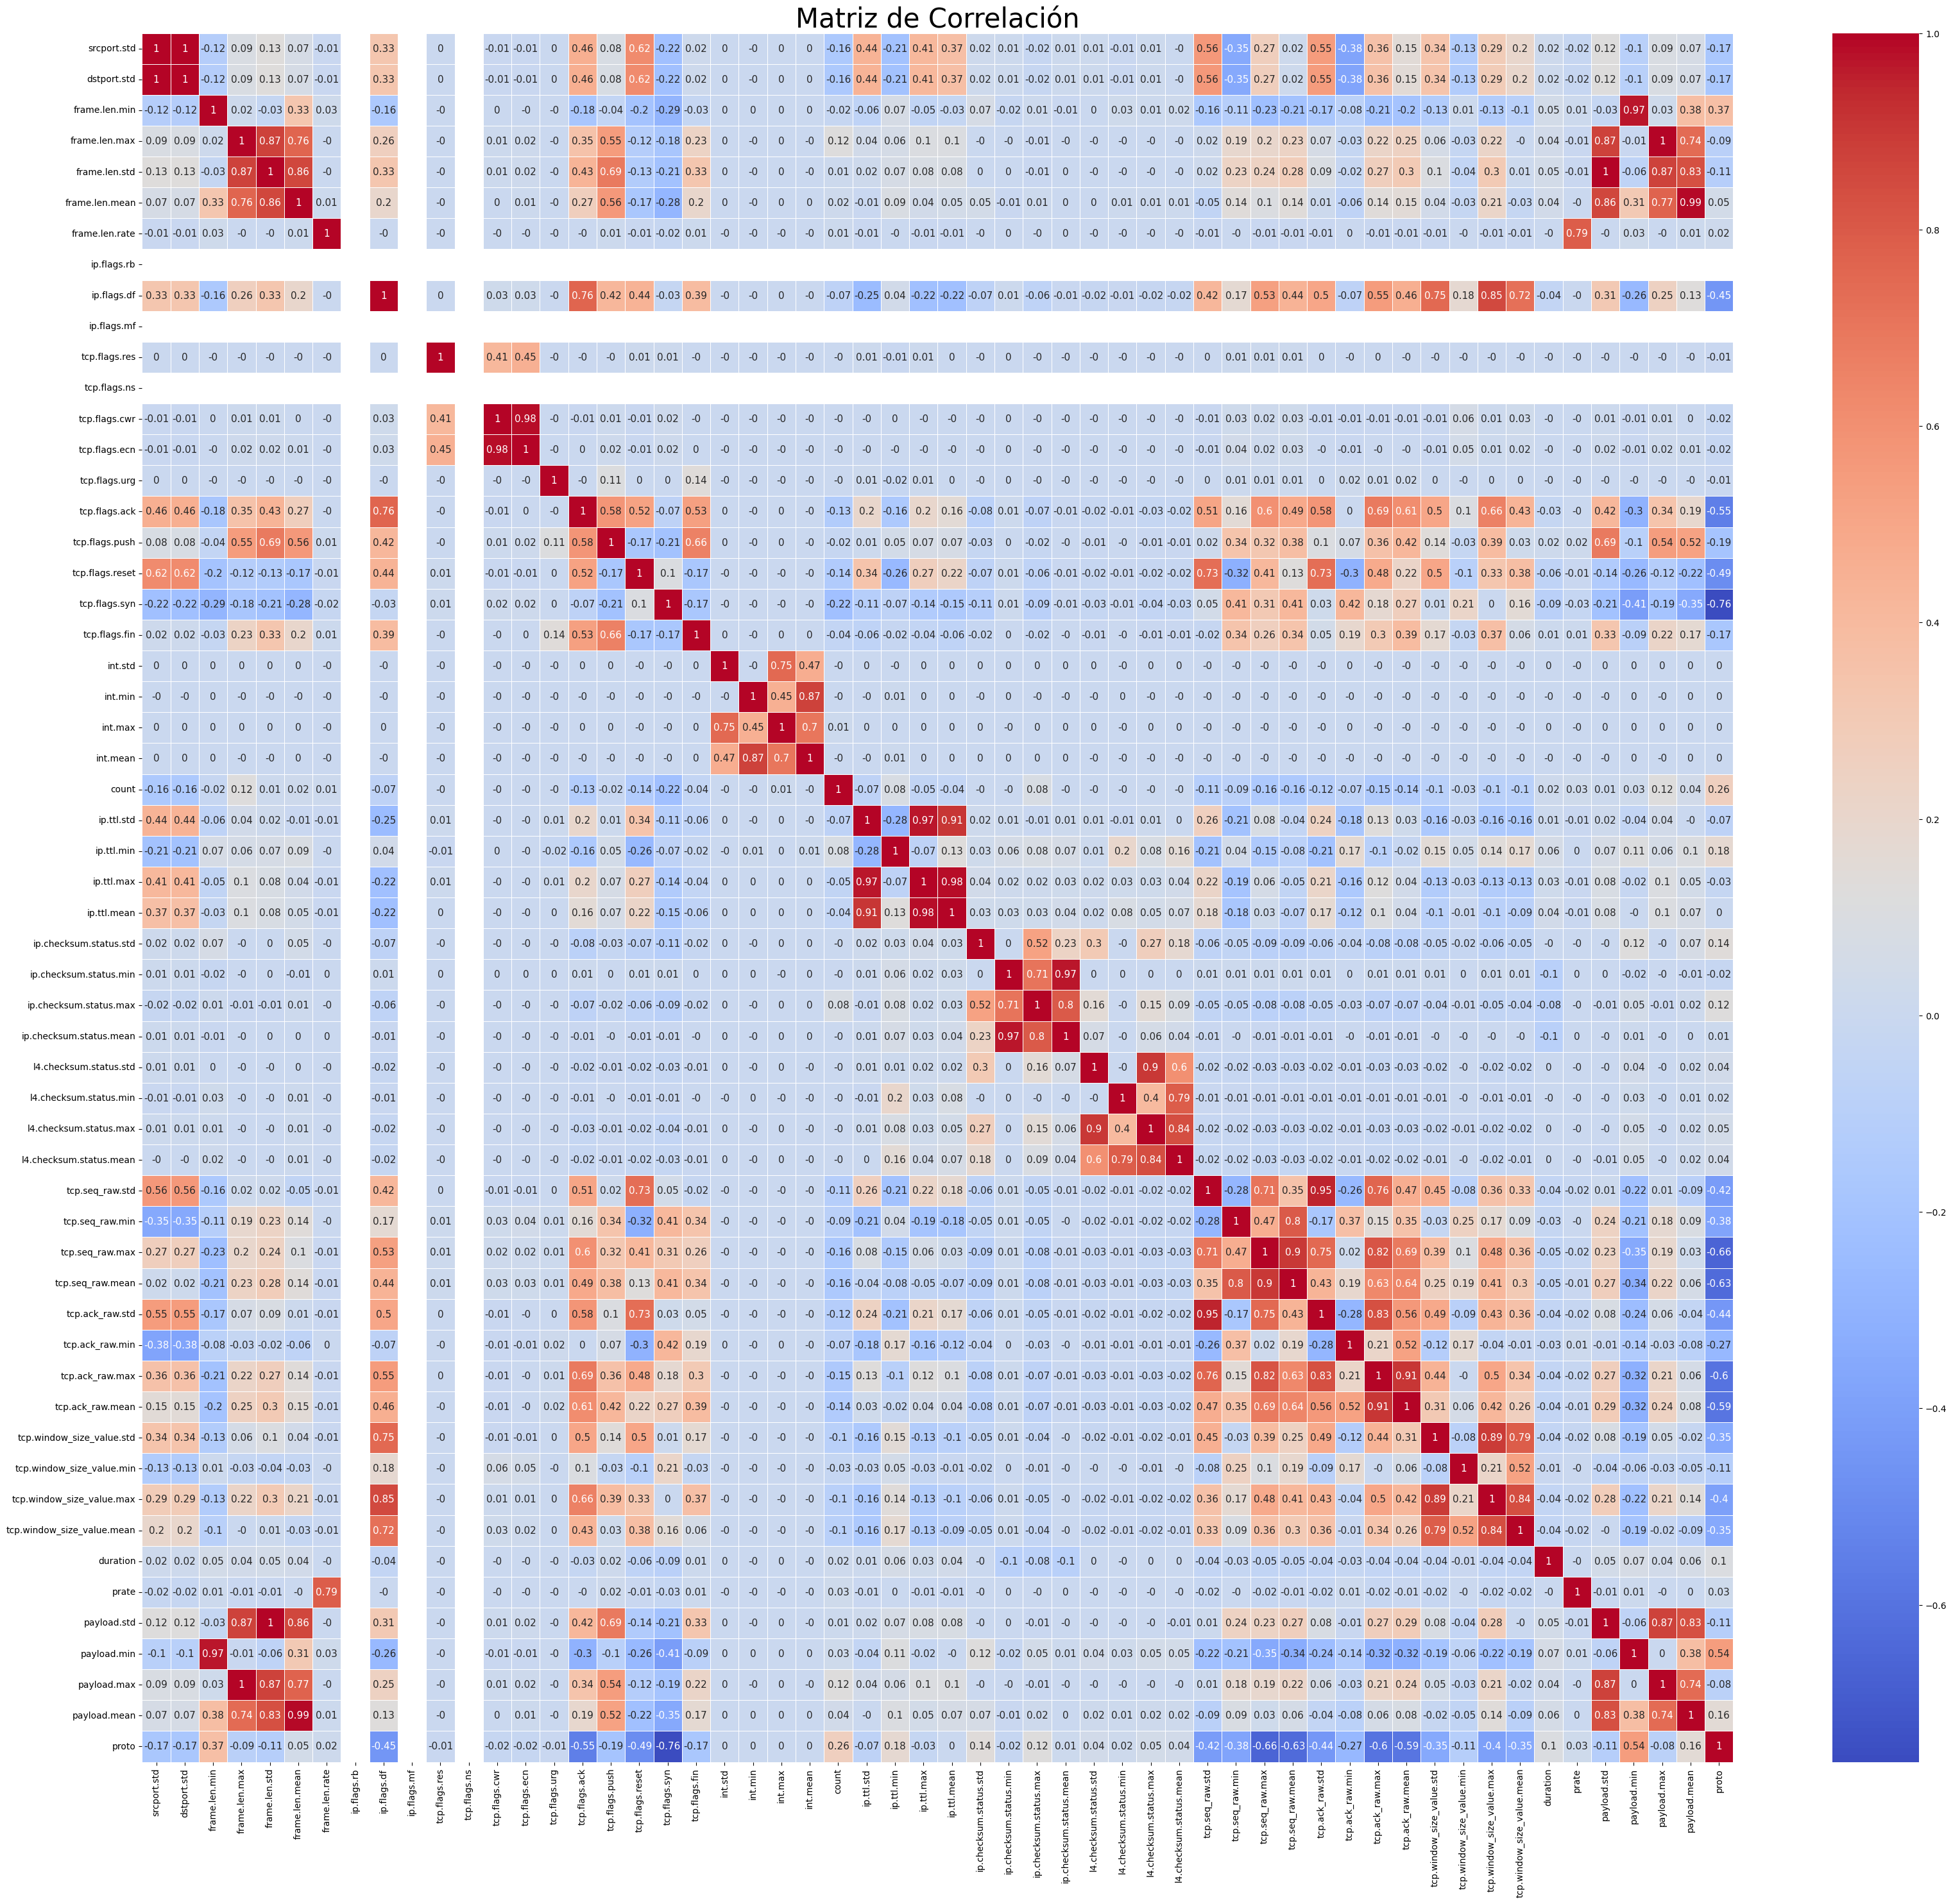

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tu dataset (ejemplo)
df = pd.read_csv("train.csv")  # Reemplaza con la ruta de tu archivo

#Eliminamos la primera columna, generada al pasar el conjunto de datos a formato csv.
df=df.drop(columns='Unnamed: 0')

df['proto'].replace({'TCP': 0, 'UDP': 1}, inplace=True)

# Separar características y etiquetas para conjunto de entrenamiento
X_df = df.drop(columns=['category'])
y_df = df['category']

# Calcular la matriz de correlación
corr_matrix = X_df.corr()
corr_matrix = corr_matrix.round(2)

# Mostrar la matriz en consola
print(corr_matrix)

plt.figure(figsize=(40, 35))  # Ajusta según necesites
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size": 11})
plt.title("Matriz de Correlación", fontsize=30)
plt.show()



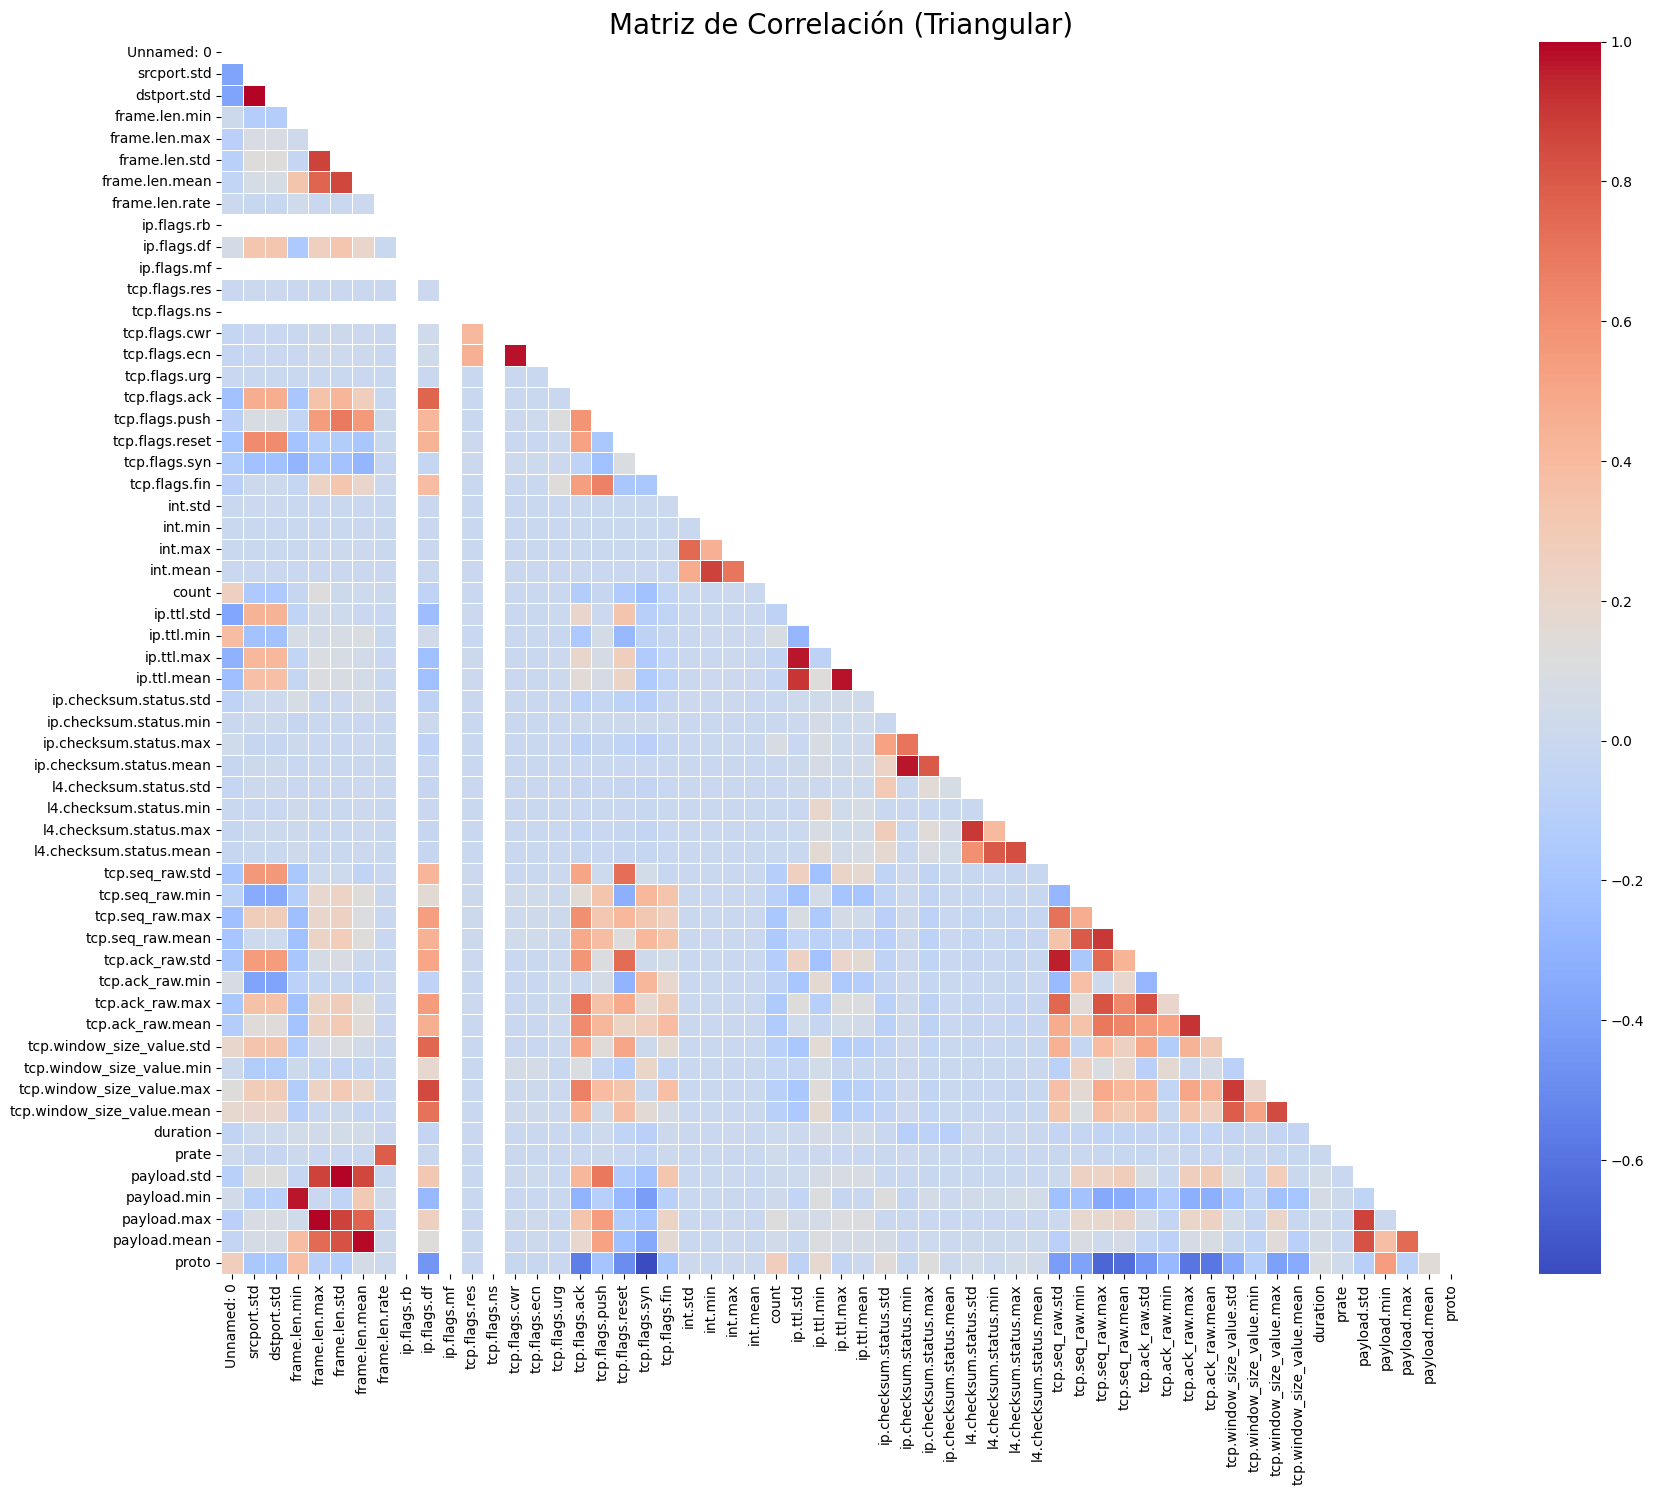

In [5]:
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Crea una máscara para la mitad superior
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (Triangular)", fontsize=20)
plt.show()


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una máscara para dejar solo valores >0.9 o <-0.9
mask = (corr_matrix.abs() < 0.9) | (np.eye(len(corr_matrix)))



# Convertimos la matriz en una tabla ordenada
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Filtramos los pares con correlación alta (>0.9) excluyendo la diagonal (1.0)
high_corr_pairs = corr_pairs[(corr_pairs > 0.9) & (corr_pairs < 1.0)]

print(high_corr_pairs)



frame.len.mean           payload.mean               0.99
payload.mean             frame.len.mean             0.99
ip.ttl.mean              ip.ttl.max                 0.98
ip.ttl.max               ip.ttl.mean                0.98
tcp.flags.ecn            tcp.flags.cwr              0.98
tcp.flags.cwr            tcp.flags.ecn              0.98
ip.ttl.max               ip.ttl.std                 0.97
ip.checksum.status.min   ip.checksum.status.mean    0.97
ip.checksum.status.mean  ip.checksum.status.min     0.97
ip.ttl.std               ip.ttl.max                 0.97
payload.min              frame.len.min              0.97
frame.len.min            payload.min                0.97
tcp.seq_raw.std          tcp.ack_raw.std            0.95
tcp.ack_raw.std          tcp.seq_raw.std            0.95
tcp.ack_raw.mean         tcp.ack_raw.max            0.91
tcp.ack_raw.max          tcp.ack_raw.mean           0.91
ip.ttl.mean              ip.ttl.std                 0.91
ip.ttl.std               ip.ttl